In [55]:
import spacy
import pandas as pd

In [56]:
!pip install spacy


In [57]:
import spacy
import pandas as pd

In [58]:
!python -m spacy download en_core_web_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 11.1 MB/s eta 0:00:00a 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [59]:
nlp = spacy.load("en_core_web_sm")


In [60]:
emma_ja = "emma woodhouse handsome clever and rich with a comfortable home and happy disposition seemed to unite some of the best blessings of existence and had lived nearly twentyone years in the world with very little to distress or vex her she was the youngest of the two daughters of a most affectionate indulgent father and had in consequence of her sisters marriage been mistress of his house from a very early period her mother had died too long ago for her to have more than an indistinct remembrance of her caresses and her place had been supplied by an excellent woman as governess who had fallen little short of a mother in affection sixteen years had miss taylor been in mr woodhouses family less as a governess than a friend very fond of both daughters but particularly of emma between them it was more the intimacy of sisters even before miss taylor had ceased to hold the nominal office of governess the mildness of her temper had hardly allowed her to impose any restraint and the shadow of authority being now long passed away they had been living together as friend and friend very mutually attached and emma doing just what she liked highly esteeming miss taylors judgment but directed chiefly by her own"
print(emma_ja)

emma woodhouse handsome clever and rich with a comfortable home and happy disposition seemed to unite some of the best blessings of existence and had lived nearly twentyone years in the world with very little to distress or vex her she was the youngest of the two daughters of a most affectionate indulgent father and had in consequence of her sisters marriage been mistress of his house from a very early period her mother had died too long ago for her to have more than an indistinct remembrance of her caresses and her place had been supplied by an excellent woman as governess who had fallen little short of a mother in affection sixteen years had miss taylor been in mr woodhouses family less as a governess than a friend very fond of both daughters but particularly of emma between them it was more the intimacy of sisters even before miss taylor had ceased to hold the nominal office of governess the mildness of her temper had hardly allowed her to impose any restraint and the shadow of auth

In [61]:
# The text is passed to the nlp() pipeline (from spaCy), which processes it and returns a Doc object named spacy_doc.
spacy_doc = nlp(emma_ja)

In [62]:
# Creates an empty pandas DataFrame named pos_df with two columns: token: for the actual word, pos_tag: for its part-of-speech tag
pos_df = pd.DataFrame(columns=['token', 'pos_tag'])
pos_df

,token,pos_tag


In [63]:
# Iterates through each token in the spacy_doc. For each token: A new one-row DataFrame is created with the token text and its POS tag. 
#This one-row DataFrame is concatenated to pos_df.

for token in spacy_doc:
    pos_df = pd.concat([pos_df, 
                        pd.DataFrame.from_records([{'token': token.text, 'pos_tag': token.pos_}])], ignore_index=True)

In [64]:
pos_df.head(15)

,token,pos_tag
0,emma,PROPN
1,woodhouse,PROPN
2,handsome,ADJ
3,clever,ADJ
4,and,CCONJ
5,rich,ADJ
6,with,ADP
7,a,DET
8,comfortable,ADJ
9,home,NOUN


In [65]:
#most common tokens and their associated POS
pos_df_counts = pos_df.groupby(['token', 'pos_tag']).size().reset_index(name='counts').sort_values(by='counts', ascending=False)

In [66]:
pos_df_counts.head(10)

,token,pos_tag,counts
88,of,ADP,14
54,her,PRON,9
49,had,AUX,9
6,and,CCONJ,8
111,the,DET,8
0,a,DET,6
114,to,PART,5
61,in,ADP,4
120,very,ADV,4
13,been,AUX,4


In [67]:
# how many different words appear under different tag

pos_df_poscounts = pos_df_counts.groupby(['pos_tag'])['token'].count().sort_values(ascending=False)

In [68]:
pos_df_poscounts.head()

pos_tag
NOUN    35
VERB    19
ADJ     18
ADV     18
PRON     9
Name: token, dtype: int64

In [69]:
# to look at individuals tags (most common nouns)
nouns = pos_df_counts[pos_df_counts.pos_tag == 'NOUN'][:10]

In [70]:
nouns

,token,pos_tag,counts
48,governess,NOUN,3
46,friend,NOUN,3
130,years,NOUN,2
28,daughters,NOUN,2
35,emma,NOUN,2
82,mother,NOUN,2
103,sisters,NOUN,2
1,affection,NOUN,1
11,authority,NOUN,1
32,distress,NOUN,1


In [71]:
import matplotlib.pyplot as plt
import string


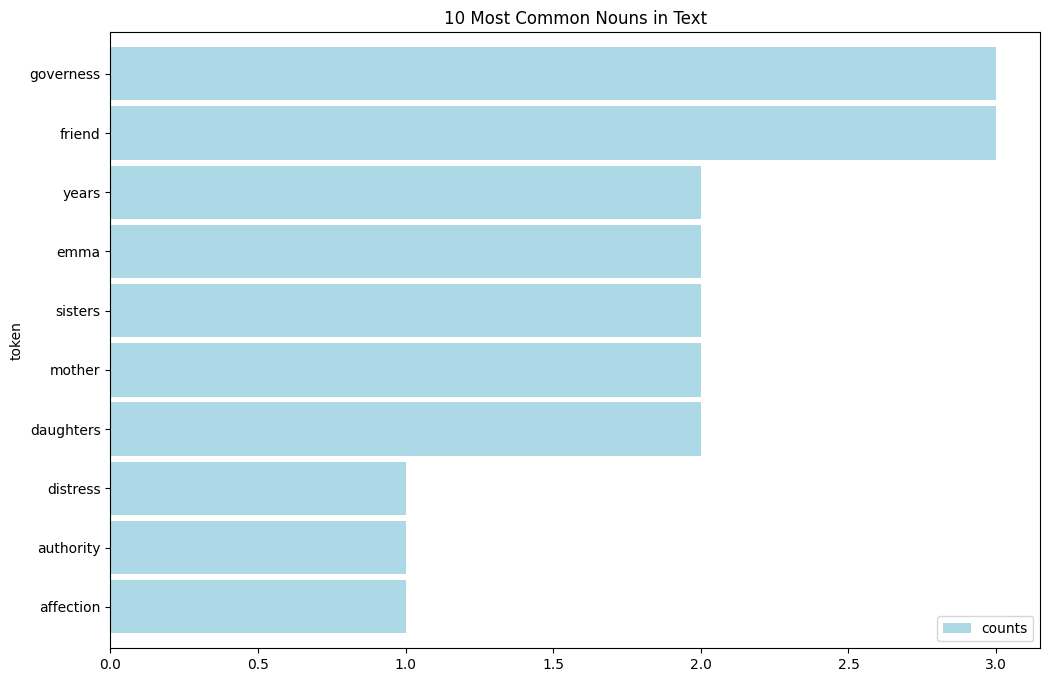

In [72]:
nouns[:10].sort_values(by='counts', ascending=True).plot.barh(x='token', y='counts', color='lightblue', width=.9, figsize=(12,8))
plt.title("10 Most Common Nouns in Text")
plt.show()

In [73]:
pwd


'/Users/moe/tagging'